<a href="https://colab.research.google.com/github/datasigntist/deeplearning/blob/master/Introduction_to_Genetic_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Genetic Computing**

Author : Vishwanathan Raman

EmailId : datasigntist@gmail.com

Description :

This notebook illustrates the concept of Genetic Computing through an example (8 Queens) based approach.

The genetic algorithm is a method for solving both constrained and unconstrained optimization problems that is based on natural selection, the process that drives biological evolution. Ref : [Genetic Computing](https://in.mathworks.com/help/gads/what-is-the-genetic-algorithm.html)

The objective of the 8 Queens is to place the 8 Queens on chessboard such that none of the Queens intersect their pathways. This can also be solved using recursion based methodology and backtracking.

In the context of Genetic Computing the following are the key elements

*   Defining a solution space by generating an initial population 
*   The solution space consists of potential configurations
*   Defining a fitness function to evaluate the solutions in the solution space
*   Here the 8 Queens can be represented by a vector (representign columns in a chessboard) which denotes the row positions of the placement of queens. The following sequence 8,3,2,1,4,5,6,7 reflects the positions where the queen has been placed in each of the columns of the chessboard. For e.g the 1st queen is placed in the 8th row of the 1st column in the chessboard, the 2nd queen is placed in the 3rd row of the 2nd column in the chessboard
*   The sequence 8,3,2,1,4,5,6,7  is one of the several possible configurations in the solutions space. Each sequence has a corresponding fitness score. In this particular context the number of non attacking pairs which is 28. Ref : https://stackoverflow.com/questions/38886580/maximum-number-of-non-attacking-pairs-of-queens-in-8-queens
*   Once the initial population and fitness score is done, new configurations are created in the solution space through crossover and mutation.
*  The following figure shows how the crossover and mutation works. The figure has been sourced from [Artificial Intelligence 3e: A Modern Approach Paperback](https://www.amazon.in/Artificial-Intelligence-3e-Modern-Approach/dp/9332543518/ref=sr_1_1_sspa?crid=3R7D136Z3TTP9&keywords=artificial+intelligence+a+modern+approach+3rd+edition&qid=1575521071&sprefix=Artificial+Inte%2Caps%2C292&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExTlUwMFlSVTdXOUxRJmVuY3J5cHRlZElkPUEwMzE2NDUxM042RkFXUUdMNFhGTiZlbmNyeXB0ZWRBZElkPUEwMTUzMjM0MjNQTkU4R0RIS01aNSZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=)




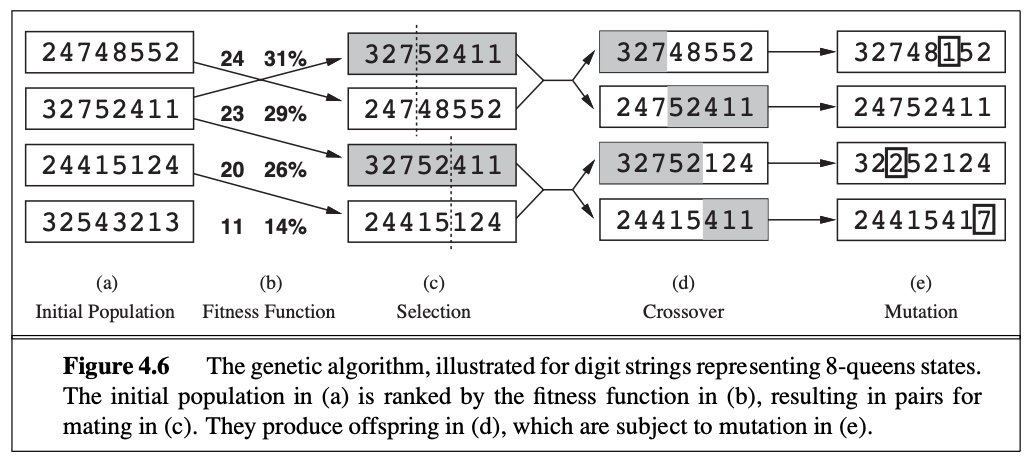

In [0]:
import numpy as np

In [0]:
def generateInitialPopulation(debug, noOfGenerations):
  eightQueensGenerations = []
  eightQueensGenerationsMatrices = []
  count = 0
  noOfCols = 8
  countOfGenerations = 0
  while countOfGenerations<noOfGenerations:
    if (debug == 1):
      print('Generation ',countOfGenerations)
    eightQueensInstance = []
    eightQueens = np.zeros((8,8))
    colCount = 0
    while colCount<noOfCols:
      rowNumber = np.random.randint(8)
      eightQueens[rowNumber, colCount] = 1
      colCount = colCount + 1
      eightQueensInstance.append(rowNumber)
    eightQueensGenerationsMatrices.append(eightQueens)
    countOfGenerations = countOfGenerations + 1
    eightQueensGenerations.append(eightQueensInstance)
  return (eightQueensGenerations,eightQueensGenerationsMatrices)

In [0]:
def measureFitnessScore(debug,currentConfiguration,currentRow,currentColumn,eightQueensGenerationsMatrices):
  conflict = 0
  if (debug==1):
    print('Upper Right Diagonals')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn 
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
  prevConflict = currentConflict
  if (debug==1):
    print('currentConflict ',currentConflict,' prevConflict ',prevConflict,' ',currentRowLoop,' ',currentColumnLoop)
  if (currentColumnLoop!=7 and currentRowLoop!=0):
    while (currentRowLoop > 0 or currentColumnLoop<8):
      currentRowLoop = currentRowLoop - 1
      currentColumnLoop = currentColumnLoop + 1
      if (currentRowLoop < 0 or currentColumnLoop>7):
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print('Conflict ',currentRowLoop,' ',currentColumnLoop)
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):          
          print('Current Conflict ',conflict)
  if (debug==1):          
    print('Upper Left Diagonals')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]  
  prevConflict = currentConflict  
  if (currentColumnLoop!=0 and currentRowLoop!=0):
    while (currentRowLoop >= 0 or currentColumnLoop >= 0):
      currentRowLoop = currentRowLoop - 1
      currentColumnLoop = currentColumnLoop - 1
      if (currentRowLoop < 0 or currentColumnLoop<0):
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print(currentRowLoop,' ',currentColumnLoop)          
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):          
          print('Current Conflict ',conflict)
  if (debug==1):          
    print('Lower Right Diagonals')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]  
  prevConflict = currentConflict  
  if (currentRowLoop!=7):
    while (currentColumnLoop < 8):
      currentRowLoop = currentRowLoop + 1
      currentColumnLoop = currentColumnLoop + 1
      if (currentRowLoop > 7 or currentColumnLoop>7):
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print(currentRowLoop,' ',currentColumnLoop)          
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):          
          print('Current Conflict ',conflict) 
  if (debug==1):          
    print('Lower Left Diagonals')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop] 
  prevConflict = currentConflict   
  if (currentColumnLoop!=0 and currentRowLoop!=7):
    while (currentColumnLoop >= 0):
      currentRowLoop = currentRowLoop + 1
      currentColumnLoop = currentColumnLoop - 1         
      if currentRowLoop > 7:
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print(currentRowLoop,' ',currentColumnLoop)          
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):  
          print('Current Conflict ',conflict)
  if (debug==1):          
      print('Horizontal Right')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop] 
  prevConflict = currentConflict   
  if (currentColumnLoop!=7):
    while (currentColumnLoop <= 7):
      currentColumnLoop = currentColumnLoop + 1         
      if currentColumnLoop > 7:
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print(currentRowLoop,' ',currentColumnLoop)          
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):  
          print('Current Conflict ',conflict)
  if (debug==1):          
      print('Horizontal Left')
  currentRowLoop = currentRow
  currentColumnLoop = currentColumn
  currentConflict = eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop] 
  prevConflict = currentConflict   
  if (currentColumnLoop!=0):
    while (currentColumnLoop >=0):
      currentColumnLoop = currentColumnLoop - 1         
      if currentColumnLoop < 0:
        break
      else:
        currentConflict = currentConflict + eightQueensGenerationsMatrices[currentConfiguration][currentRowLoop,currentColumnLoop]
        if (currentConflict > prevConflict):
          if (debug==1):
            print(currentRowLoop,' ',currentColumnLoop)          
          prevConflict = currentConflict
          conflict = conflict + 1
        if (debug==1):  
          print('Current Conflict ',conflict)
  return conflict

In [0]:
def generate8QueensMatrices(new8QueenGenerations):
  neweightQueensGenerationsMatrices = []
  for loop in range(len(new8QueenGenerations)):
    eightQueens = np.zeros((8,8))
    colCount = 0
    for inloop in range(len(new8QueenGenerations[loop])):
      eightQueens[new8QueenGenerations[loop][inloop], colCount] = 1
      colCount = colCount + 1
    neweightQueensGenerationsMatrices.append(eightQueens)
  return neweightQueensGenerationsMatrices

In [0]:
def generateNewGenerations(parentIndex0,parentIndex1,eightQueensGenerations,crossOver = 4):
  parentIndex0 = int(parentIndex0)
  parentIndex1 = int(parentIndex1)
  generationCount = 2
  newGenerations = []
  loop = 0
  while loop < generationCount:
    if (loop == 0):
      newGeneration = eightQueensGenerations[parentIndex0][0:crossOver]+eightQueensGenerations[parentIndex1][crossOver:]
    else:
      newGeneration = eightQueensGenerations[parentIndex1][0:crossOver]+eightQueensGenerations[parentIndex0][crossOver:]
    if (np.random.rand(1)>0.5):
      #Mutate
      mutatePosition = np.random.randint(8)
      mutatedNumber = np.random.randint(8)
      newGeneration[mutatePosition] = mutatedNumber
    loop = loop + 1
    newGenerations.append(newGeneration)
  return newGenerations

In [0]:
def computeFitness(eightQueensGenerations,eightQueensGenerationsMatrices):
  fitnessData = np.zeros((len(eightQueensGenerations),3))
  nonConflict = 28
  for loop in range(len(eightQueensGenerations)):
    conflict = 0
    for inloop in range(len(eightQueensGenerations[loop])):
      conflict = conflict + measureFitnessScore(0,loop,eightQueensGenerations[loop][inloop],inloop,eightQueensGenerationsMatrices)
    fitnessData[loop,0] = loop
    fitnessData[loop,1] = nonConflict-conflict
  fitnessData[:,2] = (fitnessData[:,1]/nonConflict)*100
  fitnessData = fitnessData[fitnessData[:,2].argsort()[::-1]]
  return fitnessData

In [49]:
np.random.seed(1973)
debug = 1
eightQueensGenerations,eightQueensGenerationsMatrices = generateInitialPopulation(0,100)
fitnessData = computeFitness(eightQueensGenerations,eightQueensGenerationsMatrices)

noOfGenerations = 1000

for loop in range(noOfGenerations):
  print("Generation ",loop," Fitness Cost ",fitnessData[0,2])

  if (fitnessData[0,2] == 100):
    print(eightQueensGenerations[int(fitnessData[0,0])])
    break

  superParent = int(fitnessData[0,0])
  #superIndex = np.random.randint(0,4)
  #superParent = int(fitnessData[0:10,0][superIndex])
  randomParent = np.random.randint(1,fitnessData.shape[0])
  #randomParent = int(fitnessData[10,0])
  if (debug == 1):
    print('superParent ',eightQueensGenerations[superParent],' randomParent ',eightQueensGenerations[randomParent])

  newGenerations = generateNewGenerations(superParent,randomParent,eightQueensGenerations)
  eightQueensGenerations = eightQueensGenerations+newGenerations

  neweightQueensGenerationsMatrices = generate8QueensMatrices(newGenerations)
  eightQueensGenerationsMatrices = eightQueensGenerationsMatrices+neweightQueensGenerationsMatrices

  fitnessData = computeFitness(eightQueensGenerations,eightQueensGenerationsMatrices)

Generation  0  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [3, 0, 5, 6, 2, 4, 7, 5]
Generation  1  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [5, 5, 2, 1, 4, 0, 0, 1]
Generation  2  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [0, 7, 0, 4, 0, 2, 1, 4]
Generation  3  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [0, 6, 6, 2, 3, 4, 6, 2]
Generation  4  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [3, 1, 6, 7, 4, 6, 4, 1]
Generation  5  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [4, 2, 7, 1, 0, 0, 4, 0]
Generation  6  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [1, 7, 1, 7, 0, 2, 6, 4]
Generation  7  Fitness Cost  78.57142857142857
superParent  [5, 0, 0, 3, 7, 6, 2, 1]  randomParent  [5, 0, 0, 3, 3, 4, 6, 2]
